In [25]:
#################################################################################################################
################################ Getting the file from local CSV      ###########################################
#################################################################################################################
# Load Packages / libraries
import numpy as np
import pandas as pd
import pypyodbc as podbc
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Configure notebook settings
np.set_printoptions(formatter={'float_kind':'{:f}'.format}) # To change scientific numbers to float
sns.set(rc={'figure.figsize':(8,6)}) # Increases the size of sns plots

# Loading the data
df = pd.read_csv('../04. optimised_modelling/engineered.csv')

# print the shape
print(df.shape)

#runs the first 5 rows
df.head()

(14778, 69)


,age_17 or younger,age_18-20,age_21-25,age_26-32,age_33-39,age_40-49,age_50-59,age_60-64,age_65 or older,are_food_areas_important_to_you_Entirely agree,...,how_many_hours_are_you_willing_to_travel_to_attend_an_event 1 to 2 hours,how_many_hours_are_you_willing_to_travel_to_attend_an_event 3 to 4 hours,how_many_hours_are_you_willing_to_travel_to_attend_an_event 5+ hours,do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Agree,do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Disagree,are_food_areas_important_to_you Agree,are_food_areas_important_to_you Disagree,were_you_satisfied_with_the_last_event_you_attended_with_us Disagree,would_you_recommend_our_events_to_other_people Mostly & Somewhat & Neither Unlikely,did_you_find_our_events_value_for_money Mostly & Somewhat agree
0,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


The innertia for : 2 Clusters is: 115889.01837591955
The innertia for : 3 Clusters is: 103553.96382538346
The innertia for : 4 Clusters is: 96312.40023751535
The innertia for : 5 Clusters is: 91318.39731779469
The innertia for : 6 Clusters is: 89054.4483762541
The innertia for : 7 Clusters is: 86972.1003154813
The innertia for : 8 Clusters is: 85071.791805891
The innertia for : 9 Clusters is: 83628.8933470821
The innertia for : 10 Clusters is: 82416.29549241354
The innertia for : 11 Clusters is: 81113.85732345971
The innertia for : 12 Clusters is: 80129.11806890354
The innertia for : 13 Clusters is: 78832.7328921555
The innertia for : 14 Clusters is: 78352.70287801682
The innertia for : 15 Clusters is: 77214.34372224753
The innertia for : 16 Clusters is: 76922.04495414358
The innertia for : 17 Clusters is: 76020.82669559948
The innertia for : 18 Clusters is: 75503.86100606322
The innertia for : 19 Clusters is: 74746.8543377933
The innertia for : 20 Clusters is: 74480.05111070459


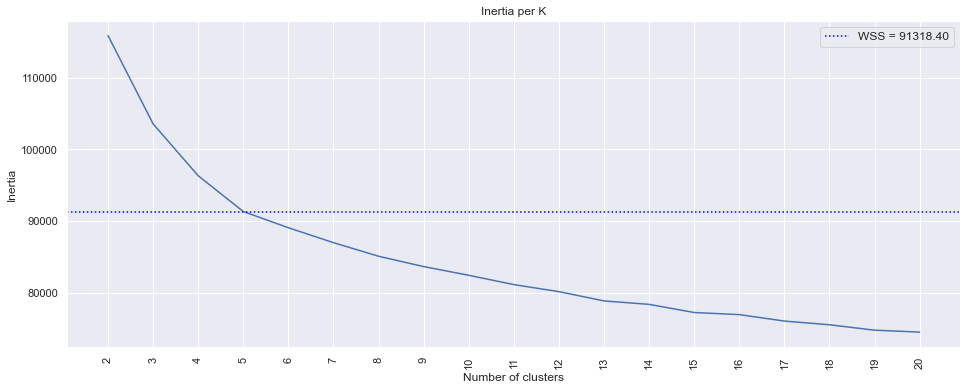

In [26]:
##########################################################
############## K-Means Clustering Training ############### 
##########################################################
# Re - Running Kmeans on "new" data
X_train = df.values

# Running K means with multible Ks

no_of_clusters = range(2,21) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

    
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("Inertia per K")
plt.axhline(91318,linestyle=':', label='WSS = 91318.40', c ="blue")
plt.legend(prop=dict(size=12))



In [27]:
##########################################################
########### K-Means Clustering Results (k=5) ############# 
##########################################################
# # Running K means on 5 clusters
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)
kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(X_train)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)

# Creating a dataframe for cluster counts
counts_df = pd.DataFrame(counts, columns = ["Cluster 1","Cluster 2","Cluster 3", "Cluster 4","Cluster 5"])
counts_df.head()

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
0,4221,1248,2844,2194,4271


Explained variance ratio (first two components): [0.192736 0.096372]


<Figure size 576x432 with 0 Axes>

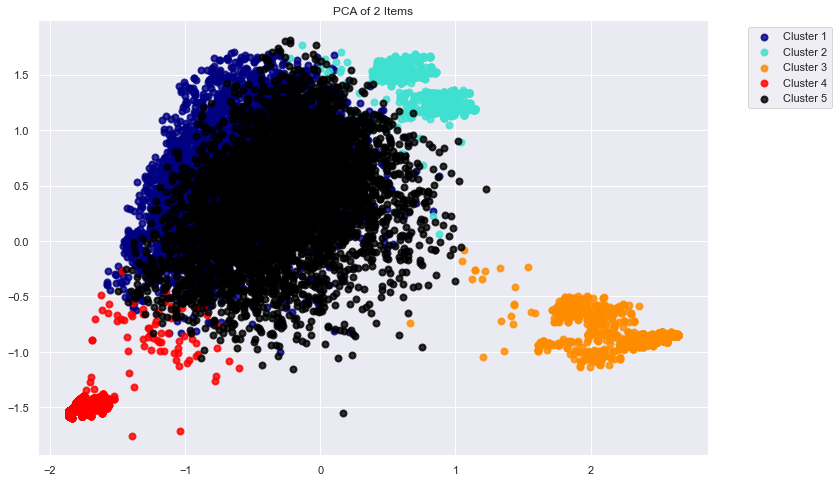

In [28]:
##########################################################
#################### Instantiate PCA ##################### 
##########################################################
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Init PCA to visualize the data
X = X_train
y_num = kmeans.predict(X_train)

target_names = ["Cluster 1","Cluster 2","Cluster 3", "Cluster 4","Cluster 5"]
pca = PCA(n_components=2, random_state = 100) #take 2 principal components 
X_r = pca.fit(X).transform(X) #take X_train shape (86 features) -> 2

# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    """
    Build the scatter plot with the n clusters.

        Parameters:
            n_components: 
            random_state: 
            lw: A decimal integer
            target_names: A list of cluster string names

        Returns:
            plt: Figure of clusters PCA built on n components
            savefig: PCA_plt.png 
    """
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.savefig('../00. output/PCA_scatterplot_final.png')
plt.show()

In [29]:
# By maximizing between cluster variance, we minimize within-cluster variance. 
# Therefore, applying PCA before clustering could potentially help you get better clusters (with more variance) in Kmeans

# Trying with Dimentionality reduction and then Kmeans
n_components = X.shape[1] #number of columns

# Running PCA with all components
pca = PCA(n_components=n_components, random_state = 100)
X_r = pca.fit(X).transform(X)

# Calculating the 95% Variance
total_variance = sum(pca.explained_variance_) #sum no. of variance across all components
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95 #this is our variance cutoff (indicates the number of components to use for Kmeans)
print("The 95% variance we want to have is: ", var_95) 
print("")

# Creating a df with the components and explained variance
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95%
print("Variance explain with 35 n_compononets: ", sum(a["Explained Variance"][0:35]))
print("Variance explain with 40 n_compononets: ", sum(a["Explained Variance"][0:40]))
print("Variance explain with 41 n_compononets: ", sum(a["Explained Variance"][0:41]))
print("Variance explain with 42 n_compononets: ", sum(a["Explained Variance"][0:42]))
print("Variance explain with 43 n_compononets: ", sum(a["Explained Variance"][0:43]))
print("Variance explain with 44 n_compononets: ", sum(a["Explained Variance"][0:44]))
print("Variance explain with 40 n_compononets: ", sum(a["Explained Variance"][0:45]))


Total Variance in our dataset is:  9.320593691463225
The 95% variance we want to have is:  8.854564006890064

Variance explain with 35 n_compononets:  8.532279526804997
Variance explain with 40 n_compononets:  8.837684536510402
Variance explain with 41 n_compononets:  8.888627086973216
Variance explain with 42 n_compononets:  8.938650060925362
Variance explain with 43 n_compononets:  8.986905976347499
Variance explain with 44 n_compononets:  9.034390354273368
Variance explain with 40 n_compononets:  9.079122915191045


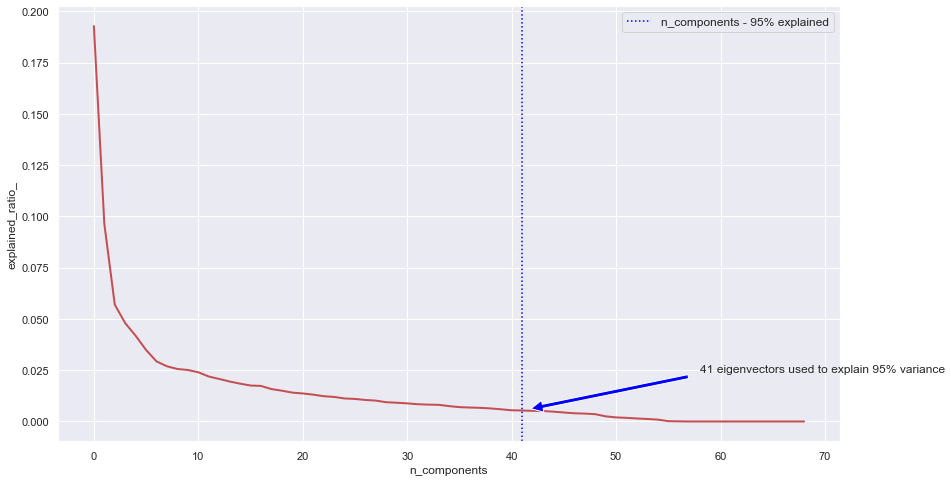

In [30]:
# Plotting the Data
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Plotting line @ 95% e.v. 
plt.axvline(41,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# adding arrow
plt.annotate('41 eigenvectors used to explain 95% variance', 
            xy=(41, pca.explained_variance_ratio_[41]), 
            xytext=(58, pca.explained_variance_ratio_[10]),
            arrowprops=dict(facecolor='blue', shrink=0.05),
            )
plt.savefig('../00. output/PCA_analysis_final.png')
plt.show()

At 2 clusters, the intertia is: 115562.95761085884
At 3 clusters, the intertia is: 103227.9719532178
At 4 clusters, the intertia is: 95986.42847384882
At 5 clusters, the intertia is: 90992.46890443543
At 6 clusters, the intertia is: 88728.49216260201
At 7 clusters, the intertia is: 86939.94317278896
At 8 clusters, the intertia is: 84745.7804963406
At 9 clusters, the intertia is: 83196.9513356258
At 10 clusters, the intertia is: 81687.92144014756
At 11 clusters, the intertia is: 80884.11212778292
At 12 clusters, the intertia is: 79920.1171590137
At 13 clusters, the intertia is: 78589.18147764118
At 14 clusters, the intertia is: 77947.94300306628
At 15 clusters, the intertia is: 76928.48139628083
At 16 clusters, the intertia is: 76455.88350374509
At 17 clusters, the intertia is: 75701.33503376835
At 18 clusters, the intertia is: 75218.44618742655
At 19 clusters, the intertia is: 74768.9461536092


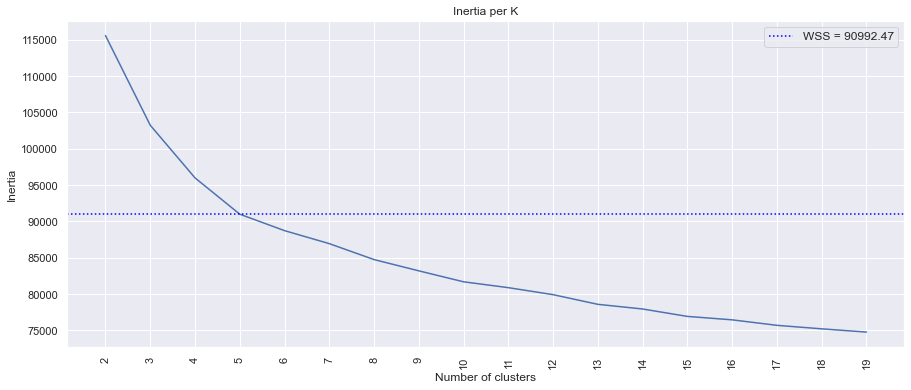

In [31]:
##########################################################
############## K-Means Clustering Training ############### 
##########################################################
no_of_clusters = range(2,20)
n_components = 53

# Running PCA with all components
pca = PCA(n_components=n_components, random_state = 100)
X_r = pca.fit(X).transform(X)
inertia = [] # the within-cluster sum of squares 

# Running K means with multible Ks
for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=100)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("At", f, "clusters, the intertia is:", u)
    
# Creating the scree plot for intertia
fig, (ax1) = plt.subplots(1, figsize=(15,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("Inertia per K")
plt.axhline(90992.47,linestyle=':', label='WSS = 90992.47', c ="blue")
plt.legend(prop=dict(size=12))
plt.savefig('../00. output/inertia_final.png')

